<a href="https://colab.research.google.com/github/LightSoyMilk/Learning-ML/blob/main/learn_titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 0. Getting the data from Kaggle
- This is to get the data set from kaggle and linking it to Google colab.
- The link to the dataset online is listed here in the URL:
https://www.kaggle.com/competitions/titanic/data?select=train.csv


In [1]:
!pip install -q opendatasets

import opendatasets as od
import pandas as pd
from google.colab import files
files.upload()

od.download('https://www.kaggle.com/c/titanic') # insert personal kaggle api key (json file)

Saving train.csv to train.csv
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: benlongtran
Your Kaggle Key: ··········


100%|██████████| 34.1k/34.1k [00:00<00:00, 92.8MB/s]


Extracting archive ./titanic/titanic.zip to ./titanic


# Step 1. Loading Data
- Confirming that the data is loaded and properly read
- We are only using the train dataset in this project, as it has the "Survived"
column, which we could split the entire dataset into training and testing sets to see the accuracy of our model
- This column is not present in the test csv on Kaggle so we would not use it to train the model on

In [2]:
# Getting the training data
df = pd.read_csv('/content/titanic/train.csv')

# Printing the training dataframe to see their content
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Step 2. Cleaning the data
- We will check for columns that have null data
- Drop/Remove some irrelevant columns like Cabin, Name, and Fare
- We will also fill in the missing entries in the Age column with the median age
- Finally, we will remove entries that have missing Embarked data

In [3]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
# Dropping columns that have no interest to us
df = df.drop(columns = ["Name", "Ticket", "Cabin"])

# Filling in the missing entries in the Age column with the median age
# The .fillna() function fills in columns with NULL or missing value with the specified in-bracket values,
# in this case, that filled in value is the median age
df["Age"] = df["Age"].fillna(df["Age"].median())

# Dropping rows where Embarked have missing values
# The .dropna() function drops/remove entries with rows that have NULL or missing values.
# In our case, we are specifying that the rows with missing/NULL values in the
# "Embarked" column will be dropped/removed
df = df.dropna(subset = ["Embarked"])

# Printing the dataframe after cleanup to see how it looks now
print(df.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C
2            3         1       3  female  26.0      0      0   7.9250        S
3            4         1       1  female  35.0      1      0  53.1000        S
4            5         0       3    male  35.0      0      0   8.0500        S


# Step 3. Spotting the pattern
- Here we will see who survied and who did not based on attributes of the people.
- This is just to see some potential patterns.

In [5]:
# Importing libraries to visualize the data
import seaborn as sns
import matplotlib.pyplot as plt

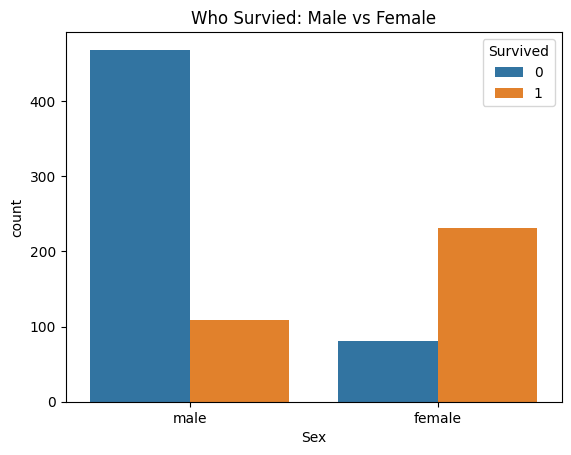

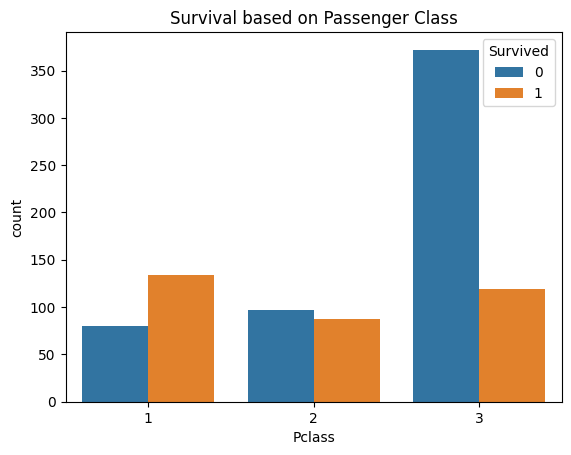

In [6]:
# Checking survival rate based on gender
sns.countplot(data = df, x = "Sex", hue = "Survived")
plt.title("Who Survied: Male vs Female")
plt.show()

# Checking survival rate based on ticket class
sns.countplot(data = df, x = "Pclass", hue = "Survived")
plt.title("Survival based on Passenger Class")
plt.show()

# Step 4. Predicting the Survival Rate with a Machine Learning model
- Here we shall build a simple model to predict survival rate based on a few features/attributes


In [7]:
"""
Step 4.1. Converting categories into numbers
"""
# Since we can't use words in a machine learning model, we would have to convert
# things like male/female or embarked locations to numbers

df["Sex"] = df["Sex"].map({"male": 0, "female": 1}) # changing male to 0 and female to 1 in representation

df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2}) # changing embarked location for S, C, Q to 0, 1, 2

In [8]:
"""
Step 4.2. Picking features
"""
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
X = df[features]
y = df["Survived"]

For the next 4 steps, here are the explanations:
1. We will split the data into training sets, and test sets. With 20% of the datasets being reserved for testing and the rest for training. Hence the test_size = 0.2. The random_state = 42 ensures that each time the data is split into the exact same way; ensuring reproducibility. The number 42 doesn't have mathematical meaning.
2. For this project, we chose the Logistic Regression model, the math behind I do not understand for now. We then fit the X and y training data into the model. The X stands for features/columns in the dataframe that we are using to predict survival rate and the y represents the predicted survival outcome based on our model.
3. Here, we take our model that has undergone training and put the test data into it (X_test) to see if the model can accurately predict the survival outcome of people it has not known about, but have information about their attributes/features.
4. Finally, we call the accuracy_score() function to compare our model's predictions with the actual data about the person's survival outcome. Luckily we got around 79% (or unluckily in a way).

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 2. Train the model
model = LogisticRegression()
model.fit(X, y)

# 3. Make predictions
predictions = model.predict(X_test)

# 4. Check accuracy
print("Accuracy: ", accuracy_score(y_test, predictions) )

Accuracy:  0.7865168539325843
